In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seastar as ss
import seastar.oscar
import seastar.retrieval

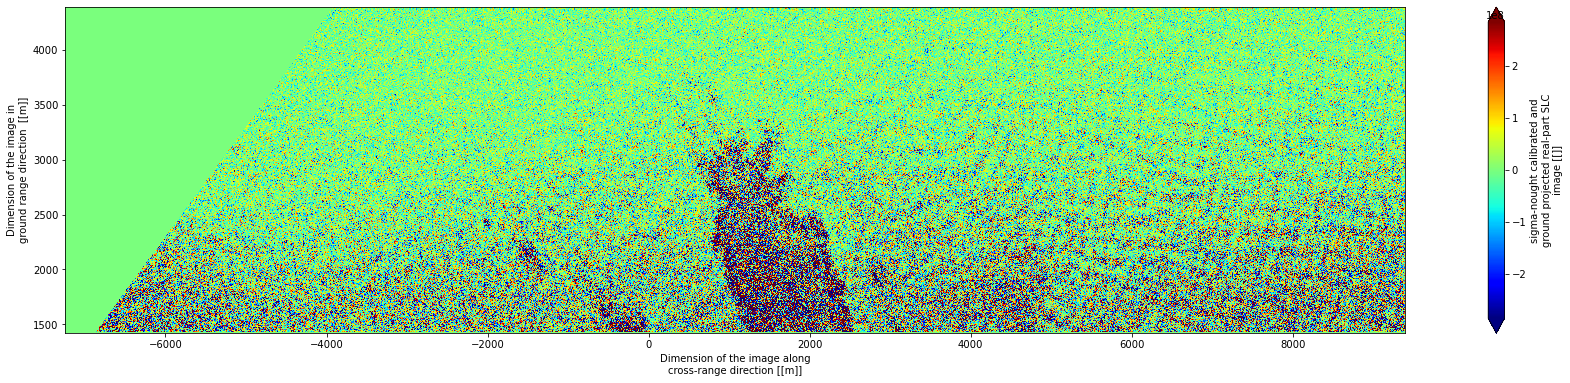

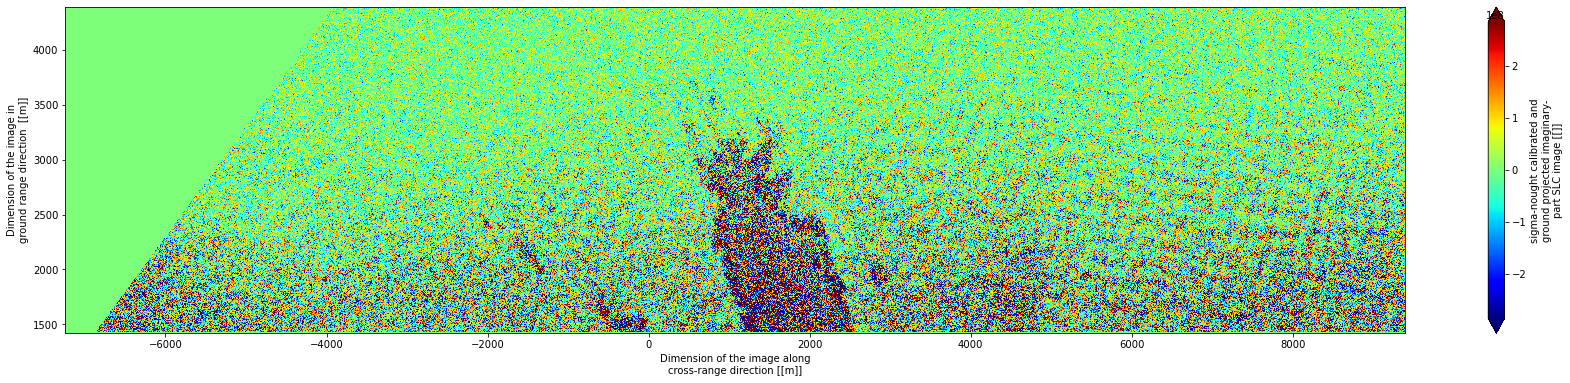

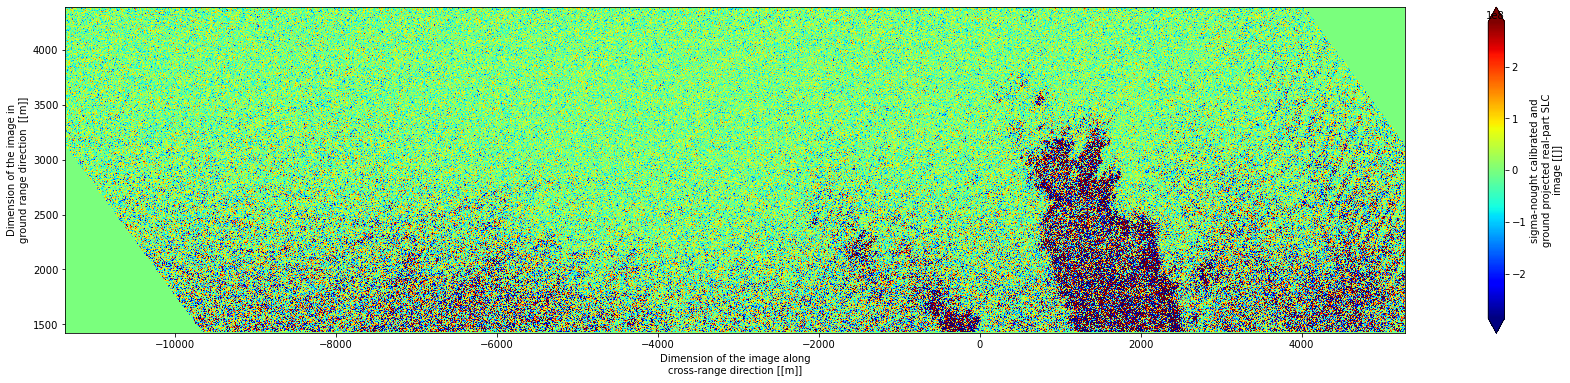

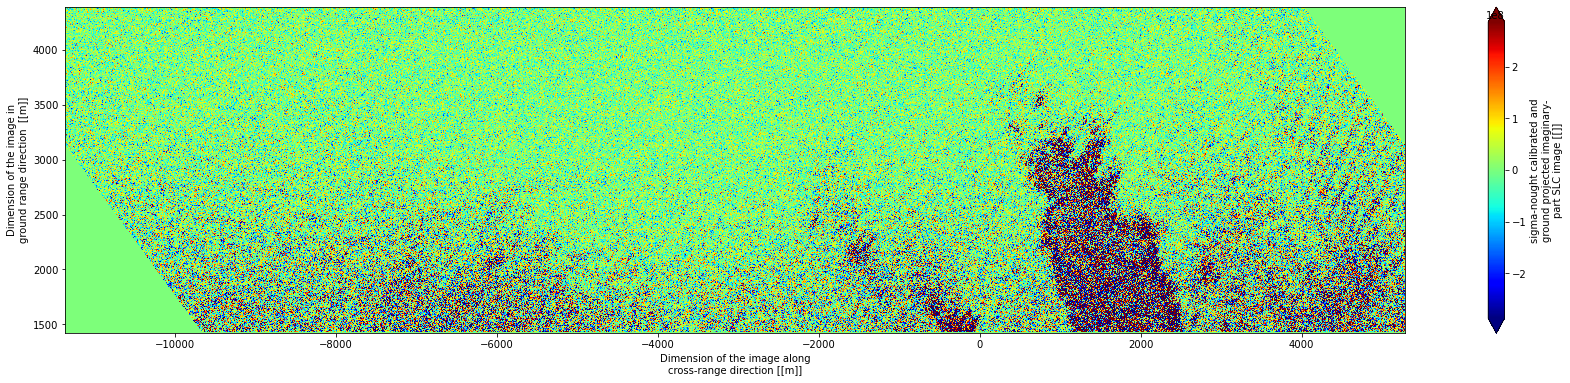

In [2]:
for_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_June_28_2022\SAR_CPLX_20220517T093239_13.5G_VV_33_pres_1_fdc_auto.sar_INF_SAR_CPLX_20220517T093239_13.5G_VV_34_pres_1_fdc_auto.sar.nc"
aft_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_June_28_2022\SAR_CPLX_20220517T093239_13.5G_VV_77_pres_1_fdc_auto.sar_INF_SAR_CPLX_20220517T093239_13.5G_VV_78_pres_1_fdc_auto.sar.nc"
dsf = xr.open_dataset(for_file, mask_and_scale=True,drop_variables='GBPGridInfo')
dsa = xr.open_dataset(aft_file, mask_and_scale=True,drop_variables='GBPGridInfo')


mid_file="D:\data\SEASTAR\SEASTARex\Data\Metasensing\OSCAR\Brest_Sample_June_28_2022\SAR_CPLX_20220517T093239_13.5G_VV_00_pres_1_fdc_auto.sar.nc"
dsm = xr.open_dataset(mid_file, mask_and_scale=True,drop_variables='GBPGridInfo')

ax1 = dsf.SigmaImageSingleLookRealPart.plot(figsize=(30, 6),
                        y='GroundRange', x='CrossRange',
                        robust=True, 
                        cmap='jet',
                      ) #vmin=700, vmax=900,

ax2 = dsf.SigmaImageSingleLookImaginaryPart.plot(figsize=(30, 6),
                        y='GroundRange', x='CrossRange',
                        robust=True, 
                        cmap='jet',
                      ) #vmin=700, vmax=900,
ax3 = dsa.SigmaImageSingleLookRealPart.plot(figsize=(30, 6),
                        y='GroundRange', x='CrossRange',
                        robust=True, 
                        cmap='jet',
                      ) #vmin=700, vmax=900,

ax4 = dsa.SigmaImageSingleLookImaginaryPart.plot(figsize=(30, 6),
                        y='GroundRange', x='CrossRange',
                        robust=True, 
                        cmap='jet',
                      ) #vmin=700, vmax=900,

In [3]:
# L1 OSCAR processing  


# Compute Fore antenna L1 variables
dsf = ss.oscar.level1.compute_multilooking_Master_Slave(dsf, window=7)
dsf = ss.oscar.level1.add_antenna_baseline(dsf, baseline=0.2)
dsf = ss.oscar.level1.compute_antenna_azimuth_direction(dsf, antenna='fore')
dsf = ss.oscar.level1.compute_time_lag_Master_Slave(dsf, options='from_SAR_time')
dsf = ss.oscar.level1.compute_radial_surface_velocity(dsf)

# Compute Aft antenna L1 variables
dsa = ss.oscar.level1.compute_multilooking_Master_Slave(dsa, window=7)
dsa = ss.oscar.level1.add_antenna_baseline(dsa, baseline=0.2)
dsa = ss.oscar.level1.compute_antenna_azimuth_direction(dsa, antenna='aft')
dsa = ss.oscar.level1.compute_time_lag_Master_Slave(dsa, options='from_SAR_time')
dsa = ss.oscar.level1.compute_radial_surface_velocity(dsa)

# Build Level1 dataset
dsl1 = ss.oscar.level1.init_level1_dataset(dsf, dsa, dsm)

# Initialise level2 dataset
dsl2=ss.oscar.level1.init_level2(dsf, dsa)

In [4]:
# Generating geophysical data fields for GMF doppler computation
u10 = 10 # wind speed
wind_direction = 20 # wind direction
aux = ss.oscar.level1.init_auxiliary(dsl1,dsa,dsf,10,20)



In [13]:
# L2 OSCAR processing
 
dsl2 = seastar.retrieval.level2.compute_radial_surface_current(dsl1, dsl2, aux, gmf='mouche12')
#level2 = compute_current_magnitude_and_direction(level2, dsf, dsa)
#level2

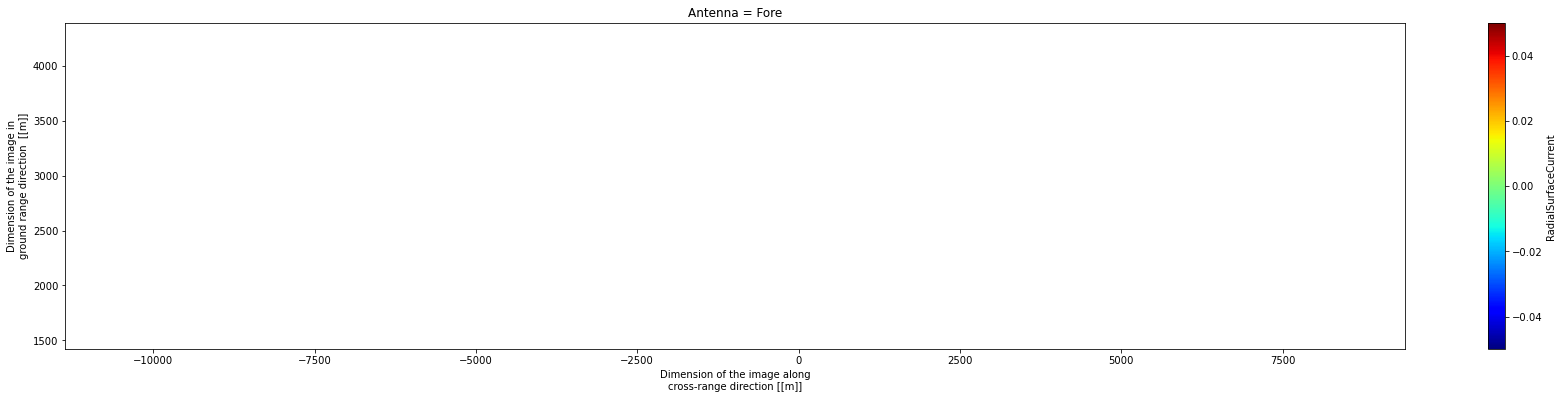

In [14]:
ax3 = dsl2.RadialSurfaceCurrent.sel(Antenna='Fore').plot(figsize=(30, 6),
                        y='GroundRange', x='CrossRange',
                        robust=True, 
                        cmap='jet',
                      ) #vmin=700, vmax=900,
#vector_density=30
#ax4=plt.quiver(Y[::vector_density, ::vector_density],
#               X[::vector_density, ::vector_density],
#               level2.CurrentVectorUComponent[::vector_density, ::vector_density],
#               level2.CurrentVectorVComponent[::vector_density, ::vector_density])
